In [40]:
# Common definitions needed throughout the code samples:

from IPython.display import \
    display_png

import qahirah as qah
from qahirah import \
    CAIRO, \
    Colour, \
    Rect, \
    Vector

import math
from math import sin, cos, pi, floor, remainder

In [41]:
# ImageSurface holds a two-dimensional array of pixels, of a specified width, height and format.
# Other surface types allow rendering directly to file formats such as PDF and SVG.

# FORMAT_ARGB32 includes 8 bits in a pixel for each of the red, green and blue components of 
# the colour, and 8 bits of alpha transparency, which can be used to produce overlay effects.
DIMENSIONS = Vector(610, 610)
CENTRE = Vector(DIMENSIONS.x / 2, DIMENSIONS.y /2)

pix = qah.ImageSurface.create \
  (
    dimensions = DIMENSIONS,
    format = CAIRO.FORMAT_ARGB32
  )

figure_dimensions = pix.dimensions

def display() :
    "(re)displays what has been drawn."
    display_png(pix.to_png_bytes(), raw = True)

print(CENTRE)

Vector(305, 305)


In [42]:
RADIUS = 300
NUM_POINTS = 32
NUM_INCREMENTS = 6

def line_length(start, end):
    start = Vector.from_tuple(start)
    end = Vector.from_tuple(end)
    
    return math.sqrt((start.x - end.x) ** 2 + (start.y - end.y) ** 2)
    
    
# rotate a,b to c,d through angle R
# c = a * cos(R) - b * sin(R)
# d = b * cos(R) + a * sin(R)
def rotate(point, locus, rotation):
    point = Vector.from_tuple(point)
    locus = Vector.from_tuple(locus)
    # Centre the rotation
    (a, b) = (point.x - locus.x, point.y - locus.y)

    c = a * cos(rotation) - b * sin(rotation)
    d = b * cos(rotation) + a * sin(rotation)
    return transform(Vector(c, d), locus)
    

def circle_points(num_points, radius, centre):
    centre = Vector.from_tuple(centre)
    
    rotation = 2*pi/num_points
    points = []
    for point in range(num_points):
        x = sin(point*rotation) * radius
        y = cos(point*rotation) * radius * -1
        points.append(transform(Vector(x, y), centre))
        
    return points


def transform(start, shift):
    start = Vector.from_tuple(start)
    shift = Vector.from_tuple(shift)
    return Vector(start.x + shift.x, start.y + shift.y)


print(transform(CENTRE, (-28, -28)))
print(line_length((60,0), (0,80)))
print(line_length((0,0), (60,80)))
print(line_length((0,100),(0,0)))
print(line_length((100,50),(100,100)))
print(rotate((0,100),(0,0),pi/2))
print(rotate((200,100),(100,100),0.5*pi))
print(rotate((200,100),(100,100),1.5*pi))
print(circle_points(4,10,(10,10)))

Vector(277, 277)
100.0
100.0
100.0
50.0
Vector(-100, 6.12323e-15)
Vector(100, 200)
Vector(100, 0)
[Vector(10, 0), Vector(20, 10), Vector(10, 20), Vector(0, 10)]


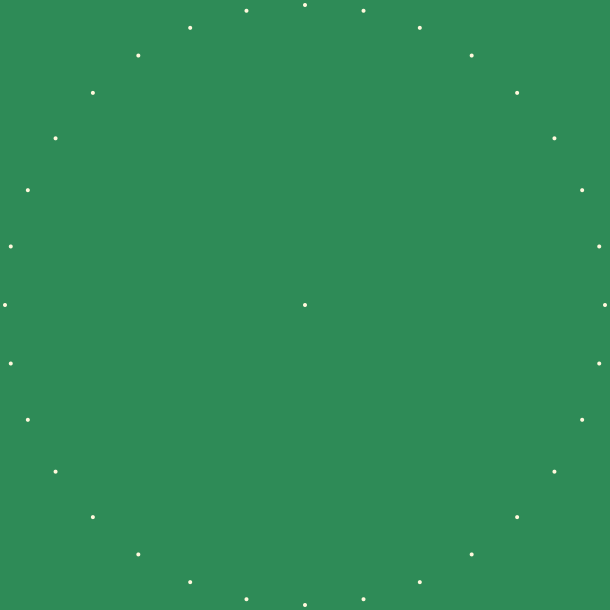

In [43]:
ctx = qah.Context.create(pix)
(ctx
    .set_source_colour(Colour.x11["sea green"])
    .paint()
    .set_source_colour(Colour.x11["cornsilk"])
    .circle(centre = CENTRE, radius = 2)
 .fill()
)

points_list = circle_points(NUM_POINTS, RADIUS, CENTRE)

for point in points_list:
    ctx.circle(centre = point, radius = 2).fill()

display()

In [44]:
test = [1, 2, 3, 4, 5, 6]
print(test[-1])
print(test[1:])
if len([]):
    print("True")
else:
    print("False")

print(test[1:-1])

print(int(remainder(9,7)))
print(int(remainder(2,7)))
print([i + 0.5 for i in test])
print(test)
(a, b, *c) = test
print (a, b, c)
t_tuple = (1, 2, 3, 4, 5)
(a, b, *c) = t_tuple
print (a, b, c)


6
[2, 3, 4, 5, 6]
False
[2, 3, 4, 5]
2
2
[1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
[1, 2, 3, 4, 5, 6]
1 2 [3, 4, 5, 6]
1 2 [3, 4, 5]


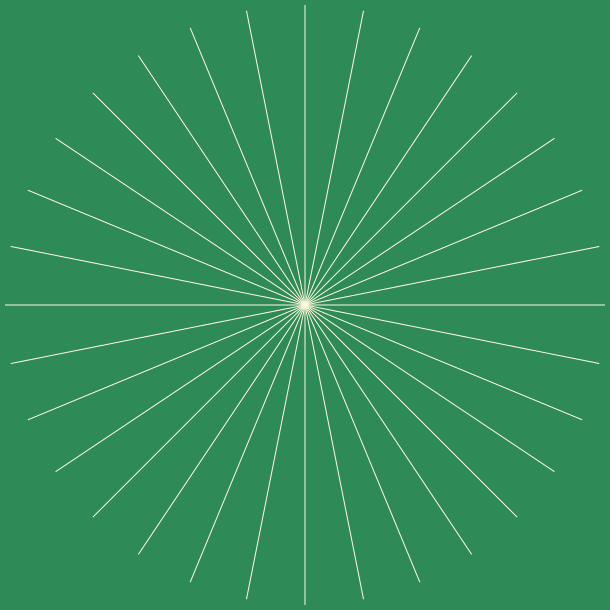

In [45]:
(ctx
 .set_source_colour(Colour.x11["sea green"])
 .paint()
 .set_source_colour(Colour.x11["cornsilk"])
 .circle(centre = CENTRE, radius = 2)
 .fill()
 .set_line_width(1)
)

def line(start, end):
    start = Vector.from_tuple(start)
    end = Vector.from_tuple(end)
    (ctx
     .move_to(start)
     .line_to(end)
     .stroke()
    )

def lines_from_point(start, end_list):
    start = Vector.from_tuple(start)
    for end in end_list:
        end = Vector.from_tuple(end)
        line(start, end)

lines_from_point(CENTRE, circle_points(NUM_POINTS, RADIUS, CENTRE))

display()

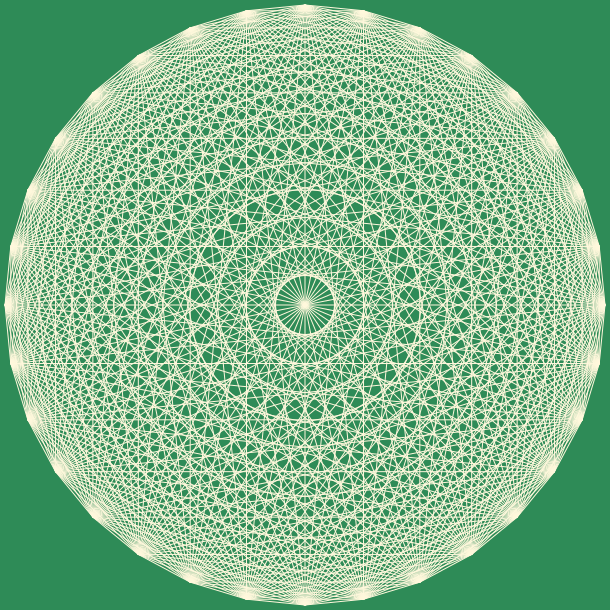

In [46]:
(ctx
 .set_source_colour(Colour.x11["sea green"])
 .paint()
 .set_source_colour(Colour.x11["cornsilk"])
 .circle(centre = CENTRE, radius = 2)
 .fill()
 .set_line_width(1)
)

point_list = circle_points(NUM_POINTS, RADIUS, CENTRE)

start = point_list[0]
remaining_points = point_list[1:]
while len(remaining_points):
    lines_from_point(start, remaining_points)
    start = remaining_points[0]
    remaining_points = remaining_points[1:]
    
display()

32 15


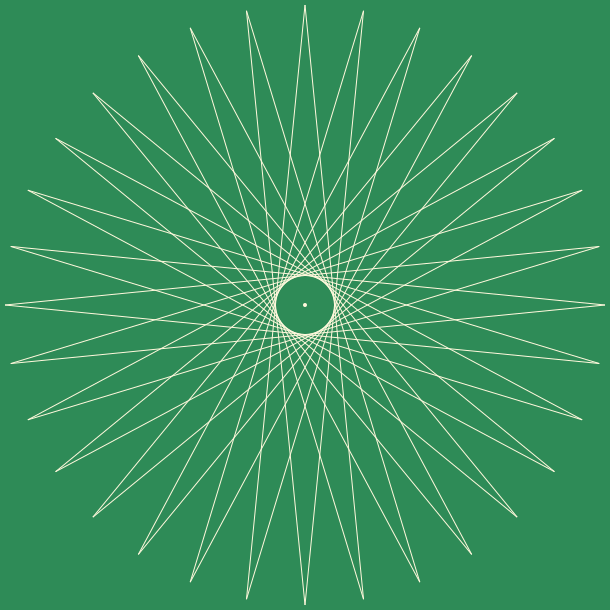

In [47]:
(ctx
 .set_source_colour(Colour.x11["sea green"])
 .paint()
 .set_source_colour(Colour.x11["cornsilk"])
 .circle(centre = CENTRE, radius = 2)
 .fill()
 .set_line_width(1)
)

point_list = circle_points(NUM_POINTS, RADIUS, CENTRE)
start = point_list[0]
length = len(point_list)
shift = floor((len(point_list)-0.5)/2)
print(length, shift)
for start_index in range(length):
    start = point_list[start_index]
    shift_index = start_index + shift
    end_index = int(remainder(shift_index, length))
    end = point_list[end_index]
    line(start, end)
    
display()

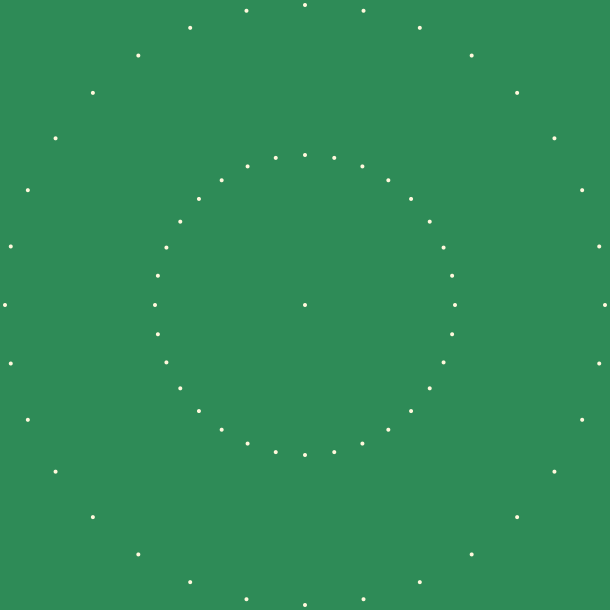

In [48]:
(ctx
    .set_source_colour(Colour.x11["sea green"])
    .paint()
    .set_source_colour(Colour.x11["cornsilk"])
    .circle(centre = CENTRE, radius = 2)
 .fill()
)

point_matrix = [
    circle_points(NUM_POINTS, RADIUS, CENTRE),
    circle_points(NUM_POINTS, RADIUS/2, CENTRE)
]

r_angle = (pi*2)/(len(point_matrix[1])*2)

for point_list in point_matrix:
    for point in point_list:
        ctx.circle(centre = point, radius = 2).fill()

display()

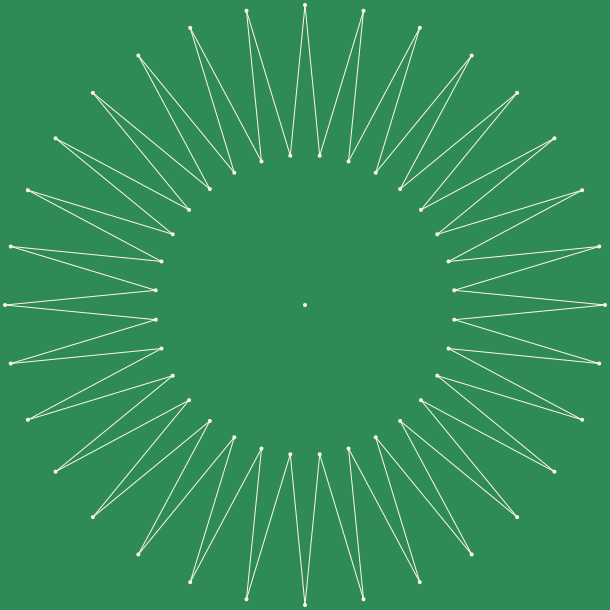

In [49]:
(ctx
    .set_source_colour(Colour.x11["sea green"])
    .paint()
    .set_source_colour(Colour.x11["cornsilk"])
    .circle(centre = CENTRE, radius = 2)
 .fill()
)

point_matrix = [
    circle_points(NUM_POINTS, RADIUS, CENTRE),
    [rotate(point, CENTRE, r_angle) for point in circle_points(NUM_POINTS, RADIUS/2, CENTRE)]
]

r_angle = (pi*2)/(len(point_matrix[1])*2)

for i in range(len(point_matrix[0])):
    lines_from_point(point_matrix[0][i], [point_matrix[1][i], point_matrix[1][i-1]])

for point_list in point_matrix:
    for point in point_list:
        ctx.circle(centre = point, radius = 2).fill()

display()

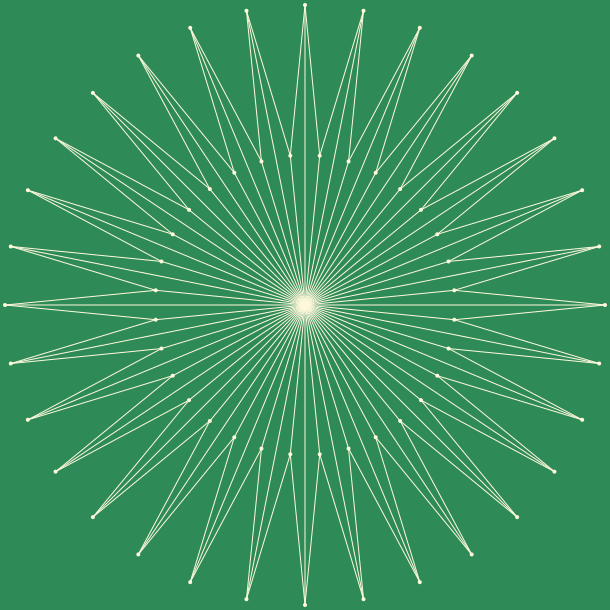

In [50]:
(ctx
 .set_source_colour(Colour.x11["sea green"])
 .paint()
 .set_source_colour(Colour.x11["cornsilk"])
)

point_matrix = [
    circle_points(NUM_POINTS, RADIUS, CENTRE),
    [rotate(point, CENTRE, r_angle) for point in circle_points(NUM_POINTS, RADIUS/2, CENTRE)]
]

r_angle = (pi*2)/(len(point_matrix[1])*2)

for i in range(len(point_matrix[0])):
    lines_from_point(point_matrix[0][i], [point_matrix[1][i], point_matrix[1][i-1]])

lines_from_point(CENTRE, point_matrix[0])
lines_from_point(CENTRE, point_matrix[1])
for point_list in point_matrix:
    for point in point_list:
        ctx.circle(centre = point, radius = 2).fill()

display()

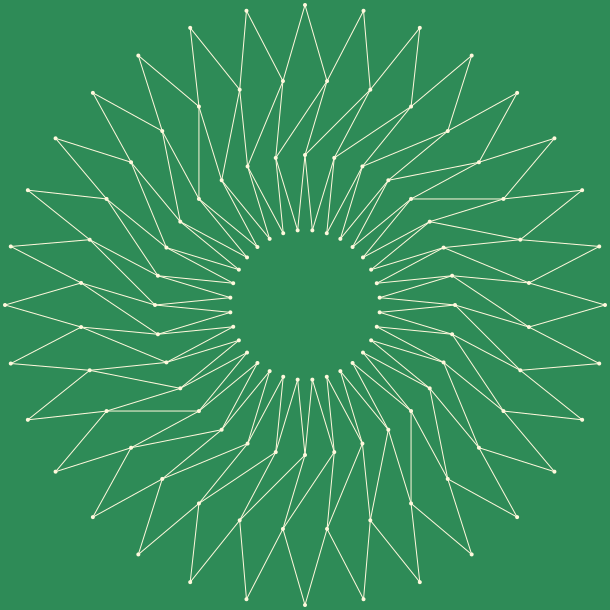

In [78]:
(ctx
 .set_source_colour(Colour.x11["sea green"])
 .paint()
 .set_source_colour(Colour.x11["cornsilk"])
)
NUM_RINGS = 4

point_matrix = []
for i in range(NUM_RINGS):
    if remainder(i, 2):
        point_matrix.append(circle_points(NUM_POINTS, RADIUS*(i+1)/NUM_RINGS, CENTRE))
    else:
        point_matrix.append(
            [rotate(point, CENTRE, r_angle) for point in circle_points(NUM_POINTS, RADIUS*(i+1)/NUM_RINGS, CENTRE)]
        )

r_angle = (pi*2)/(len(point_matrix[1])*2)

for x in range(NUM_RINGS-1):
    for i in range(len(point_matrix[x])):
        line(point_matrix[x][i], point_matrix[x+1][i])
        r = (i + 1) % len(point_matrix[x])
        line(point_matrix[x][i], point_matrix[x+1][r])
#        lines_from_point(point_matrix[x][i], [point_matrix[x+1][i], point_matrix[x+1][i+1]])

#lines_from_point(CENTRE, point_matrix[-1])
#lines_from_point(CENTRE, point_matrix[-2])
for point_list in point_matrix:
    for point in point_list:
        ctx.circle(centre = point, radius = 2).fill()

display()